<a href="https://colab.research.google.com/github/AARONGRANICH/MCD_Ingenieria-de-Caracteristicas/blob/main/MCD_INGCAR_PROYECTO1_DescargaDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

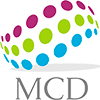


> **Universidad De Sonora**


> Maestría: en Ciencia de datos

> Curso: Ingeniería de Características

> Proyecto 1. Descargando datos de la web

Alumno: **Aarón Francisco Granich Armenta**

Expediente: *A210214575*


# **Generalidad del proyecto**

Realizar un programa el cual descargue datos de distintas fuentes ya sea API’s, algún método de descarga masiva de datos, datos de la Web,  

**Requisitos:**
* Un SCRIP o Libreta para la descarga de datos de al menos 2 fuentes distintas:
 *	Debe generar un archivo de texto con la descripción de las fuentes
 *	Debe generar las fechas de descarga 
 * Generar de ser posible la descripción (o enlaces) que explique la naturaliza de los datos
* Un SRIP o libreta que transforme los datos de acuerdo con su tipo, selecciones la información que sea utilizar y generen los DataFrames necesarios.
* Un diccionario de datos por cada DataFrame


# **Descargando datos de la base de datos del INEGI y API de data Mexico**

**Fuente 1:** Descargaremos los datos del "*Censos y Conteos de Población y Vivienda*" del INGE (datos del estado de sonora del año 2020 ultimos dispobiles)

**Fuente 2:** Descargaremos los datos disponibles de la API de data México

# Iniciamos con el proyecto

1. Instalamos alguna de las liberarias que vamos a utlizar ya que COLAB no la tiene instalada.

In [3]:
!apt-get install wget
!pip install wget

Reading package lists... Done
Building dependency tree       
Reading state information... Done
wget is already the newest version (1.19.4-1ubuntu2.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=c69007dd99298ba519f11b05a036aef89092026a02b7486118dfcbda36300f7f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


2. Importando las librerias que vamos a uilizar

In [34]:
import os
import urllib.request
import requests
import pandas as pd 
import numpy
import zipfile
import wget
import json
import datetime
import zipfile 

3. Iniciamos con la descarga de los primeros datos, utilizando la URL de la pagina del INEGI donde se encuentran los datos

In [5]:
url = "https://www.inegi.org.mx/contenidos/programas/ccpv/2020/datosabiertos/iter/"
nombreArchivo= "iter_26_cpv2020_csv.zip"
subdir="./datosCENSO2020Sonora"
info = """
        Los datos son del "El Censo de Población y Vivienda 2020" del estado de Sonora
        se realizó del 2 al 27 de marzo.
        """ 

if not os.path.exists(nombreArchivo):
        if not os.path.exists(subdir): #verificamos que la carpeta de datos no exista
            url= url + nombreArchivo #le damos la url completa 
            wget.download(url) #Descargamos el archivo
            with zipfile.ZipFile(nombreArchivo, 'r') as zip_ref:# Descomprimimos el archivo
                zip_ref.extractall(subdir + "./") #Extraemos todo lo que contiene el archivo
            os.remove(nombreArchivo) #Eliminamos el archivo zip para quedarnos con el descomprimido  
        
with open(subdir + "info.txt", 'w') as f:
        f.write("Exportaciones por Entidad Federativa\n")
        f.write(info + '\n')
        f.write("Descargado el " + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + "\n")
        f.write("Desde: " + url + "\n")
        f.write("Nombre: " + nombreArchivo + "\n")


4. Leemos el archivo que de guardo en la carpeta que indicamos.

In [6]:
carpeta= "./datosCENSO2020Sonora./iter_26_cpv2020/conjunto_de_datos/conjunto_de_datos_iter_26CSV20.csv"
df_censo2020 = pd.read_csv(carpeta)
df_censo2020

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,26,Sonora,0,Total de la entidad Sonora,0,Total de la Entidad,NaN,NaN,NaN,2944840,...,811378,530511,501521,210780,126299,32807,48777,302080,11895,*
1,26,Sonora,0,Total de la entidad Sonora,9998,Localidades de una vivienda,NaN,NaN,NaN,16883,...,3776,686,1563,139,92,629,627,3598,261,*
2,26,Sonora,0,Total de la entidad Sonora,9999,Localidades de dos viviendas,NaN,NaN,NaN,5087,...,1322,268,639,44,30,217,222,1206,100,*
3,26,Sonora,1,Aconchi,0,Total del Municipio,NaN,NaN,NaN,2563,...,704,254,613,53,43,35,61,468,18,*
4,26,Sonora,1,Aconchi,1,Aconchi,"110°13'42.787"" W","29°49'33.141"" N",607.0,1650,...,473,193,394,42,34,19,32,290,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,26,Sonora,72,San Ignacio Río Muerto,340,Ninguno [José Palma],"110°11'56.440"" W","27°20'44.190"" N",8.0,2,...,*,*,*,*,*,*,*,*,*,1
7496,26,Sonora,72,San Ignacio Río Muerto,342,Cornelio Saucedo,"110°21'43.366"" W","27°23'25.691"" N",7.0,2,...,*,*,*,*,*,*,*,*,*,1
7497,26,Sonora,72,San Ignacio Río Muerto,343,Santa Bárbara,"110°12'33.900"" W","27°19'01.253"" N",6.0,1,...,*,*,*,*,*,*,*,*,*,1
7498,26,Sonora,72,San Ignacio Río Muerto,9998,Localidades de una vivienda,NaN,NaN,NaN,296,...,85,11,29,2,1,19,15,86,5,*


5. Iniciamos a dejar solo  de los datos que necesitamos



*   Primero Filtramos los renglones que necesitamos



In [7]:
df_censo2020_1 = df_censo2020[df_censo2020.NOM_LOC == "Total del Municipio"] #Filtramos solo los renglones que tienen la cantidad que nos interesa
df_censo2020_1

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
3,26,Sonora,1,Aconchi,0,Total del Municipio,NaN,NaN,NaN,2563,...,704,254,613,53,43,35,61,468,18,*
13,26,Sonora,2,Agua Prieta,0,Total del Municipio,NaN,NaN,NaN,91929,...,25677,18734,19940,6616,4143,822,965,7320,173,*
114,26,Sonora,3,Alamos,0,Total del Municipio,NaN,NaN,NaN,24976,...,5763,1409,4292,461,232,904,1248,5304,527,*
392,26,Sonora,4,Altar,0,Total del Municipio,NaN,NaN,NaN,9492,...,2480,1275,1931,368,275,118,143,1221,39,*
493,26,Sonora,5,Arivechi,0,Total del Municipio,NaN,NaN,NaN,1177,...,320,247,265,21,20,53,51,140,21,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7105,26,Sonora,68,Villa Pesqueira,0,Total del Municipio,NaN,NaN,NaN,1043,...,322,88,273,19,11,36,44,274,13,*
7143,26,Sonora,69,Yécora,0,Total del Municipio,NaN,NaN,NaN,4793,...,1150,299,908,36,35,242,297,1155,125,*
7216,26,Sonora,70,General Plutarco Elías Calles,0,Total del Municipio,NaN,NaN,NaN,13627,...,3804,1952,3042,630,460,215,193,1860,58,*
7291,26,Sonora,71,Benito Juárez,0,Total del Municipio,NaN,NaN,NaN,21692,...,5230,1942,2433,363,195,365,682,3737,189,*




*   Despues seleccionamos solo las columnas que necesitamos



In [8]:
df_censo2020_2 = pd.DataFrame(df_censo2020_1, columns=["NOM_MUN", "NOM_LOC","POBTOT", "POBFEM", "POBMAS", "P_0A2", "P_0A2_F", "P_0A2_M", "P_3A5", "P_3A5_F", "P_3A5_M","P_6A11", "P_6A11_F","P_6A11_M", "P_12A14", "P_12A14_F", "P_12A14_M", "P_15A17", "P_15A17_F", "P_15A17_M", "P_18A24", "P_18A24_F", "P_18A24_M", "P_25A29", "P_25A29_F","P_25A29_M"]) #filtramos ciertas columnas
df_censo2020_2.reset_index(drop=True, inplace=True) #reseteamos index
df_censo2020_2

,NOM_MUN,NOM_LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3A5,P_3A5_F,...,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_25A29,P_25A29_F,P_25A29_M
0,Aconchi,Total del Municipio,2563,1227,1336,99,46,53,116,58,...,71,136,71,65,248,106,142,165,76,89
1,Agua Prieta,Total del Municipio,91929,46118,45811,4486,2237,2249,4978,2508,...,2799,5322,2594,2728,11432,5711,5721,7037,3556,3481
2,Alamos,Total del Municipio,24976,12067,12909,1015,538,477,1283,639,...,733,1365,630,735,2516,1219,1297,1517,770,747
3,Altar,Total del Municipio,9492,4780,4712,474,243,231,533,265,...,318,631,305,326,1107,573,534,663,343,320
4,Arivechi,Total del Municipio,1177,583,594,52,27,25,48,22,...,28,48,25,23,77,46,31,65,30,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Villa Pesqueira,Total del Municipio,1043,451,592,26,12,14,29,13,...,30,50,19,31,74,28,46,57,23,34
68,Yécora,Total del Municipio,4793,2378,2415,218,113,105,264,128,...,133,245,117,128,404,193,211,294,155,139
69,General Plutarco Elías Calles,Total del Municipio,13627,6900,6727,693,351,342,805,406,...,429,810,413,397,1350,706,644,945,504,441
70,Benito Juárez,Total del Municipio,21692,10791,10901,1100,528,572,1153,562,...,603,1192,564,628,2537,1204,1333,1444,729,715


6. Validamos los tipos de datos en nuestro nuevo dataframe

In [9]:
df_censo2020_2.dtypes

NOM_MUN      object
NOM_LOC      object
POBTOT        int64
POBFEM       object
POBMAS       object
P_0A2        object
P_0A2_F      object
P_0A2_M      object
P_3A5        object
P_3A5_F      object
P_3A5_M      object
P_6A11       object
P_6A11_F     object
P_6A11_M     object
P_12A14      object
P_12A14_F    object
P_12A14_M    object
P_15A17      object
P_15A17_F    object
P_15A17_M    object
P_18A24      object
P_18A24_F    object
P_18A24_M    object
P_25A29      object
P_25A29_F    object
P_25A29_M    object
dtype: object

7. Como no podemos sumar tipos de datos Object, Cambiamos los datos de tipo object a int, pero para hacer esto primero tenemos que pasarlos de object a str y despues de str a int.

In [10]:
df_censo2020_2[['POBFEM', 'POBMAS','P_0A2','P_0A2_F','P_0A2_M','P_3A5','P_3A5_F','P_3A5_M','P_6A11','P_6A11_F','P_6A11_M','P_12A14','P_12A14_F','P_12A14_M','P_15A17','P_15A17_F','P_15A17_M','P_18A24','P_18A24_F','P_18A24_M','P_25A29','P_25A29_F','P_25A29_M']] = df_censo2020_2[['POBFEM', 'POBMAS','P_0A2','P_0A2_F','P_0A2_M','P_3A5','P_3A5_F','P_3A5_M','P_6A11','P_6A11_F','P_6A11_M','P_12A14','P_12A14_F','P_12A14_M','P_15A17','P_15A17_F','P_15A17_M','P_18A24','P_18A24_F','P_18A24_M','P_25A29','P_25A29_F','P_25A29_M']].astype(str).astype(int)
df_censo2020_2.dtypes

NOM_MUN      object
NOM_LOC      object
POBTOT        int64
POBFEM        int64
POBMAS        int64
P_0A2         int64
P_0A2_F       int64
P_0A2_M       int64
P_3A5         int64
P_3A5_F       int64
P_3A5_M       int64
P_6A11        int64
P_6A11_F      int64
P_6A11_M      int64
P_12A14       int64
P_12A14_F     int64
P_12A14_M     int64
P_15A17       int64
P_15A17_F     int64
P_15A17_M     int64
P_18A24       int64
P_18A24_F     int64
P_18A24_M     int64
P_25A29       int64
P_25A29_F     int64
P_25A29_M     int64
dtype: object

6. Sumamos algunas de las columas para obtener los datos de personas de 0 a 29 años totales, 0 a 29 años Femenino, 0 a 29 años Masculino

In [11]:
df_censo2020_2['Poblacion de 0 a 29 años'] = df_censo2020_2['P_0A2'] + df_censo2020_2['P_3A5'] + df_censo2020_2['P_6A11'] + df_censo2020_2['P_12A14']+ df_censo2020_2['P_15A17']+ df_censo2020_2['P_18A24']+ df_censo2020_2['P_25A29']
df_censo2020_2['Poblacion de 0 a 29 años Femenina'] = df_censo2020_2['P_0A2_F'] + df_censo2020_2['P_3A5_F'] + df_censo2020_2['P_6A11_F'] + df_censo2020_2['P_12A14_F']+ df_censo2020_2['P_15A17_F']+ df_censo2020_2['P_18A24_F']+ df_censo2020_2['P_25A29_F']
df_censo2020_2['Poblacion de 0 a 29 años Masculina'] = df_censo2020_2['P_0A2_M'] + df_censo2020_2['P_3A5_M'] + df_censo2020_2['P_6A11_M'] + df_censo2020_2['P_12A14_M']+ df_censo2020_2['P_15A17_M']+ df_censo2020_2['P_18A24_M']+ df_censo2020_2['P_25A29_M']
df_censo2020_2

,NOM_MUN,NOM_LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3A5,P_3A5_F,...,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_25A29,P_25A29_F,P_25A29_M,Poblacion de 0 a 29 años,Poblacion de 0 a 29 años Femenina,Poblacion de 0 a 29 años Masculina
0,Aconchi,Total del Municipio,2563,1227,1336,99,46,53,116,58,...,65,248,106,142,165,76,89,1138,528,610
1,Agua Prieta,Total del Municipio,91929,46118,45811,4486,2237,2249,4978,2508,...,2728,11432,5711,5721,7037,3556,3481,49078,24377,24701
2,Alamos,Total del Municipio,24976,12067,12909,1015,538,477,1283,639,...,735,2516,1219,1297,1517,770,747,11737,5731,6006
3,Altar,Total del Municipio,9492,4780,4712,474,243,231,533,265,...,326,1107,573,534,663,343,320,5153,2602,2551
4,Arivechi,Total del Municipio,1177,583,594,52,27,25,48,22,...,23,77,46,31,65,30,35,473,244,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Villa Pesqueira,Total del Municipio,1043,451,592,26,12,14,29,13,...,31,74,28,46,57,23,34,362,145,217
68,Yécora,Total del Municipio,4793,2378,2415,218,113,105,264,128,...,128,404,193,211,294,155,139,2229,1113,1116
69,General Plutarco Elías Calles,Total del Municipio,13627,6900,6727,693,351,342,805,406,...,397,1350,706,644,945,504,441,7269,3734,3535
70,Benito Juárez,Total del Municipio,21692,10791,10901,1100,528,572,1153,562,...,628,2537,1204,1333,1444,729,715,10828,5311,5517


7. Volvemos a realizar una seleccion de columnas de nuestro DataFrame

In [12]:
df_censo2020_3 = pd.DataFrame(df_censo2020_2, columns=["NOM_MUN", "POBTOT", "POBFEM", "POBMAS","Poblacion de 0 a 29 años","Poblacion de 0 a 29 años Femenina","Poblacion de 0 a 29 años Masculina"]) #filtramos ciertas columnas
df_censo2020_3

,NOM_MUN,POBTOT,POBFEM,POBMAS,Poblacion de 0 a 29 años,Poblacion de 0 a 29 años Femenina,Poblacion de 0 a 29 años Masculina
0,Aconchi,2563,1227,1336,1138,528,610
1,Agua Prieta,91929,46118,45811,49078,24377,24701
2,Alamos,24976,12067,12909,11737,5731,6006
3,Altar,9492,4780,4712,5153,2602,2551
4,Arivechi,1177,583,594,473,244,229
...,...,...,...,...,...,...,...
67,Villa Pesqueira,1043,451,592,362,145,217
68,Yécora,4793,2378,2415,2229,1113,1116
69,General Plutarco Elías Calles,13627,6900,6727,7269,3734,3535
70,Benito Juárez,21692,10791,10901,10828,5311,5517


8. Cambiamos los nombres de algunas columnas

In [13]:
df_censo2020_3.rename({'NOM_MUN': 'Municipio', 'POBTOT': 'Poblacion total', 'POBFEM': 'Poblacion Total Femenina', 'POBMAS':'Poblacion Total Masculina'}, axis=1, inplace=True) #cabiamos el nombre de las columnas
df_censo2020_3

,Municipio,Poblacion total,Poblacion Total Femenina,Poblacion Total Masculina,Poblacion de 0 a 29 años,Poblacion de 0 a 29 años Femenina,Poblacion de 0 a 29 años Masculina
0,Aconchi,2563,1227,1336,1138,528,610
1,Agua Prieta,91929,46118,45811,49078,24377,24701
2,Alamos,24976,12067,12909,11737,5731,6006
3,Altar,9492,4780,4712,5153,2602,2551
4,Arivechi,1177,583,594,473,244,229
...,...,...,...,...,...,...,...
67,Villa Pesqueira,1043,451,592,362,145,217
68,Yécora,4793,2378,2415,2229,1113,1116
69,General Plutarco Elías Calles,13627,6900,6727,7269,3734,3535
70,Benito Juárez,21692,10791,10901,10828,5311,5517


# Iniciaremos con la descarga de la segunda fuente de datos


*   Datos de la pagina de Data México



9. Iniciamos con la descarga de la segunda fuente de datos que es desde la API de data México

In [43]:
url2 = requests.get('https://datamexico.org/api/data?Age=3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24&School+Attendance=1&State=26&Year=2020&cube=inegi_population&drilldowns=Municipality&measures=Population&parents=false&locale=es')
json2 = url2.json()
json2.keys()
df2 = pd.DataFrame(json2['data'])
df2['Municipality'] = df2['Municipality'].replace(['Álamos'], 'Alamos') #Cambiamos nombre de Municipo para igualar DF
df2['Municipality'] = df2['Municipality'].replace(['Ónavas'], 'Onavas') #Cambiamos nombre de Municipo para igualar DF
df2

,Municipality ID,Municipality,Population
0,26001,Aconchi,589
1,26002,Agua Prieta,24107
2,26003,Alamos,6382
3,26004,Altar,2518
4,26005,Arivechi,249
...,...,...,...
67,26068,Villa Pesqueira,201
68,26069,Yécora,1018
69,26070,General Plutarco Elías Calles,3739
70,26071,Benito Juárez,5356


10. Descargamos datos otros datos adicionales desde la API de data México

In [44]:
url3 = requests.get('https://datamexico.org/api/data?Age=3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24&State=26&Year=2020&cube=inegi_population&drilldowns=Municipality&measures=Population&parents=false&locale=es')
json3 = url3.json()
json3.keys()
df3 = pd.DataFrame(json3['data'])
df3 = pd.DataFrame(df3, columns=["Municipality","Population"])
df3.reset_index(drop=True, inplace=True) #reseteamos index
df3.rename({'Population': 'Population Total'}, axis=1, inplace=True) #cambiamos de nombre las columnas 
df3['Municipality'] = df3['Municipality'].replace(['Álamos'], 'Alamos') #Cambiamos nombre de Municipo para igualar DF
df3['Municipality'] = df3['Municipality'].replace(['Ónavas'], 'Onavas') #Cambiamos nombre de Municipo para igualar DF
df3

,Municipality,Population Total
0,Aconchi,866
1,Agua Prieta,38220
2,Alamos,9220
3,Altar,3911
4,Arivechi,357
...,...,...
67,Villa Pesqueira,278
68,Yécora,1751
69,General Plutarco Elías Calles,5636
70,Benito Juárez,8154


11. Generamos 1 solo DataFrame

In [45]:
df_final = pd.merge(df2,df3) #Unimos los dos DF
df_final

,Municipality ID,Municipality,Population,Population Total
0,26001,Aconchi,589,866
1,26002,Agua Prieta,24107,38220
2,26003,Alamos,6382,9220
3,26004,Altar,2518,3911
4,26005,Arivechi,249,357
...,...,...,...,...
67,26068,Villa Pesqueira,201,278
68,26069,Yécora,1018,1751
69,26070,General Plutarco Elías Calles,3739,5636
70,26071,Benito Juárez,5356,8154


12. Vamos a dejar solo las columnas que necesitamos y cambiaremos los nombres de las columas

In [46]:
df_final.rename({'Municipality': 'Municipio', 'Population': 'Estudiantes total de 3 a 24 años', 'Population Total':'Poblacion de 3 a 24 años'}, axis=1, inplace=True)
df_final = pd.DataFrame(df_final, columns=["Municipio","Estudiantes total de 3 a 24 años","Poblacion de 3 a 24 años"])
df_final

,Municipio,Estudiantes total de 3 a 24 años,Poblacion de 3 a 24 años
0,Aconchi,589,866
1,Agua Prieta,24107,38220
2,Alamos,6382,9220
3,Altar,2518,3911
4,Arivechi,249,357
...,...,...,...
67,Villa Pesqueira,201,278
68,Yécora,1018,1751
69,General Plutarco Elías Calles,3739,5636
70,Benito Juárez,5356,8154


# Terminaremos haciendo el ultimo DataFrame

13. Vamos a unir los Dataframe en 1 solo

In [47]:
df = pd.merge(df_censo2020_3,df_final) #Unimos los dos DF
df

,Municipio,Poblacion total,Poblacion Total Femenina,Poblacion Total Masculina,Poblacion de 0 a 29 años,Poblacion de 0 a 29 años Femenina,Poblacion de 0 a 29 años Masculina,Estudiantes total de 3 a 24 años,Poblacion de 3 a 24 años
0,Aconchi,2563,1227,1336,1138,528,610,589,866
1,Agua Prieta,91929,46118,45811,49078,24377,24701,24107,38220
2,Alamos,24976,12067,12909,11737,5731,6006,6382,9220
3,Altar,9492,4780,4712,5153,2602,2551,2518,3911
4,Arivechi,1177,583,594,473,244,229,249,357
...,...,...,...,...,...,...,...,...,...
67,Villa Pesqueira,1043,451,592,362,145,217,201,278
68,Yécora,4793,2378,2415,2229,1113,1116,1018,1751
69,General Plutarco Elías Calles,13627,6900,6727,7269,3734,3535,3739,5636
70,Benito Juárez,21692,10791,10901,10828,5311,5517,5356,8154


14. Por Ultimo Guardamos y leemos nuestro DataFrame 

In [ ]:
df.to_parquet('Censo2020 Datos Poblacion de 0 a 29 años.csv') 

In [ ]:
pd.read_parquet('Censo2020 Datos Poblacion de 0 a 29 años.csv')

,Municipio,Poblacion total,Poblacion Total Femenina,Poblacion Total Masculina,Poblacion de 0 a 29 años,Poblacion de 0 a 29 años Femenina,Poblacion de 0 a 29 años Masculina,Poblacion tota de 3 a 24 años,Estudiantes de 3 a 24 años
0,Aconchi,2563,1227,1336,1138,528,610,589,866
1,Agua Prieta,91929,46118,45811,49078,24377,24701,24107,38220
2,Alamos,24976,12067,12909,11737,5731,6006,6382,9220
3,Altar,9492,4780,4712,5153,2602,2551,2518,3911
4,Arivechi,1177,583,594,473,244,229,249,357
...,...,...,...,...,...,...,...,...,...
67,Villa Pesqueira,1043,451,592,362,145,217,201,278
68,Yécora,4793,2378,2415,2229,1113,1116,1018,1751
69,General Plutarco Elías Calles,13627,6900,6727,7269,3734,3535,3739,5636
70,Benito Juárez,21692,10791,10901,10828,5311,5517,5356,8154
